# LogisticReg Test
***
In this notebook, I'll try to use my logistic regression implementation (LogisticReg) over a simple datasets I created, this training data consists of 18 surface points labeled either 0 or 1, this points can be separated by a circle.

First of all, we import:
1. *numpy* for linear algebra (matrix handling) though it's not required, it's already imported by LinearReg
2. *matplotlib.pyplot* to do some plotting and see the results
3. *pandas* to load the data from a csv file
4. *LogisticReg* (personal implementation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LogisticReg import LogisticReg as lgr

Now let's load our dataset:

In [2]:
data = pd.read_csv('./datasets/LogisticReg.csv')

To visualize the structure, we can use the .head(n) method to return the first *n* rows:

In [3]:
data.head(4)

,ID,x1,x2,y
0,0,0.0,0.00,0
1,1,0.0,0.70,0
2,2,-0.5,0.50,0
3,3,-0.5,1.23,0


Now we extract our features' matrix & labels vector by:

In [4]:
X = data.iloc[:, 1:3].to_numpy(dtype=np.float32)
y = data.iloc[:, 3].to_numpy(dtype=np.int32)

print('X: ')
print(X[:4, :]) # print first 4 rows
print('')
print('feature vector = ', y)

X: 
[[ 0.    0.  ]
 [ 0.    0.7 ]
 [-0.5   0.5 ]
 [-0.5   1.23]]

feature vector =  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


Below, using pyplot I visualize the data on a 2D Surface:

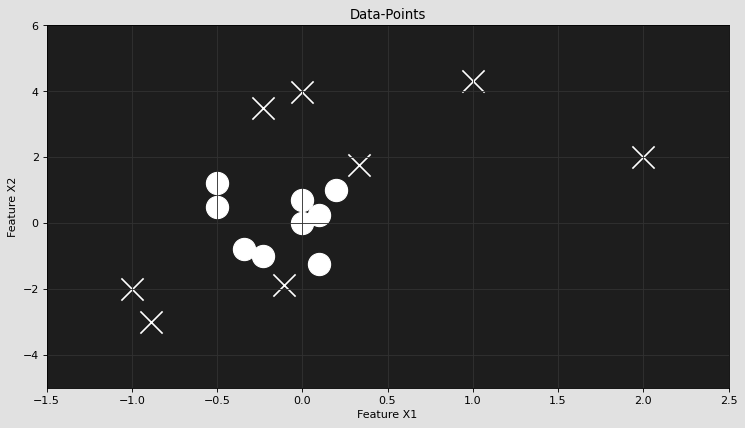

In [5]:
X1 = X[:, 0] # feature 1
X2 = X[:, 1] # feature 2

X1_True = np.array([x1 for ind, x1 in enumerate(X1) if y[ind] == 1]) # x1's labeled true (1)
X2_True = np.array([x2 for ind, x2 in enumerate(X2) if y[ind] == 1]) # x2's labeled true (1)


X1_False = np.array([x1 for ind, x1 in enumerate(X1) if y[ind] == 0]) # x1's labeled true (0))
X2_False = np.array([x2 for ind, x2 in enumerate(X2) if y[ind] == 0]) # x2's labeled true (0)


fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d') # some dark background

ax.scatter(X1_True, X2_True, marker='x', c='w', s=400)
ax.scatter(X1_False, X2_False, marker='o', c='w', s=400)

plt.ylim((-5, 6)) # y axis range
plt.xlim((-1.5, 2.5)) # x axis range

plt.title('Data-Points')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.grid(color='#313131')

plt.show() # show plot

As we can see, our data-points are not linearly separable, but can be separated with a circle, an ellipse, so it would be essential to add polynomial features (to degree 2 is enough), below I just keep the new polynomial features as they're sufficient to get a good accuracy.

In [6]:
X_sqr = X ** 2
X_sqr = np.insert(X_sqr, [0], 1, axis=1)

model = lgr().fit(X_sqr, y, learning_rate=0.01, regularization_rate=0, tol=1e-4, max_iter=1200,
                  verbose=0) # train using gradient descent

print('model successfully trained!')
print('model converged ? = ', model.converged_)

model successfully trained!
model converged ? =  1


If you want to see the training progression per iteration, just set verbose=1 in fit params, now we trained our model, we can get insights about how well does the model fit the data by using the metrics returned by *mode.confusion_matrix()*:

In [7]:
cmatrix, precision, recall, f1_score, accuracy = model.confusion_matrix(X_sqr, y)
pd_cmatrix = pd.DataFrame(data=cmatrix, columns=['predicted-as-1', 'predicted-as-0'], 
                          index=['actual-1', 'actual-0'])
pd_cmatrix.head(2)

,predicted-as-1,predicted-as-0
actual-1,9,0
actual-0,0,9


In [8]:
print('accuracy = ', accuracy)
print('precision = ', precision)
print('recall = ', recall)
print('f1_score = ', f1_score)

accuracy =  1.0
precision =  1.0
recall =  1.0
f1_score =  1.0


The model has well fit the training data, since it's just for explanation purposes and the data doesn't signify anything, I didn't use any validation nor a test set but in real world problems thos steps are mendatory to get a good model and make the best variance-bias trade off.

Below I plot on the surface the points of our datasets all with the decision boundary.

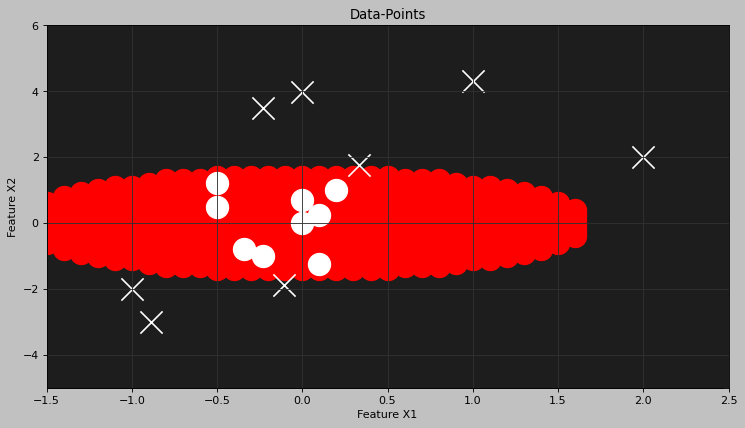

In [14]:
x1_range = np.arange(-1.5, 2.5, 0.1)
x2_range = np.arange(-5, 6, 0.1)
X_range = []
for x1 in x1_range:
    for x2 in x2_range:
        X_range.append([x1, x2])
X_range = np.array(X_range)

X_range_sqr = X_range ** 2

X_range_sqr = np.insert(X_range_sqr, [0], 1, axis=1) # 1dd bias feature
y_range = model.predict(X_range_sqr, prob=0, thresh=0.5)

x1_range_true = np.array([x1 for ind, x1 in enumerate(X_range[:, 0]) if y_range[ind] == 1])
x2_range_true = np.array([x2 for ind, x2 in enumerate(X_range[:, 1]) if y_range[ind] == 1])

x1_range_false = np.array([x1 for ind, x1 in enumerate(X_range[:, 0]) if y_range[ind] == 0])
x2_range_false = np.array([x2 for ind, x2 in enumerate(X_range[:, 1]) if y_range[ind] == 0])

fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(x1_range_true, x2_range_true, marker='o', c='#1d1d1d', s=400)
ax.scatter(x1_range_false, x2_range_false, marker='o', c='r', s=400)

ax.scatter(X1_True, X2_True, marker='x', c='w', s=400)
ax.scatter(X1_False, X2_False, marker='o', c='w', s=400)

plt.ylim((-5, 6))
plt.xlim((-1.5, 2.5))

plt.title('Data-Points')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.grid(color='#313131')

plt.show()

# Some References
***

1. [Wikipedia's Logistic Regression Article](https://en.wikipedia.org/wiki/Logistic_regression)
2. [Coursera Andrew Ng's Machine Learning Course ~ Logistic Regression](https://www.coursera.org/)
3. [Wikipedia's Cross Entropy Article](https://en.wikipedia.org/wiki/Cross_entropy)
4. [Wikipedia's Gradient Descent Article](https://en.wikipedia.org/wiki/Gradient_descent)
5. [Wikipedia's Confusion Matrix Article](https://en.wikipedia.org/wiki/Confusion_matrix)